## Training a perceptron via scikit-learn
- We will use the already familiar Iris dataset throughout the following sections.
- We will only use two features from the Iris flower dataset for visualization purposes.

In [1]:
'''
we will assign "petal length" and "petal width" of the 150 flower samples to the feature
matrix "X" and the corresponding class labels of the flower species to the vector "y"
'''
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [2]:
'''
shuffle split
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
'''
-> Feature scaling for optimal performance.
Standardize the features using the "StandardScaler" from 
sklearn "preprocessing"
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
'''
using a Perceptron to train on data.

n_iter: number of iterations
eta0: learning rate
'''
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
'''
predicting and testing for all the misclassifed data points.
'''
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test!=y_pred).sum())

#finding accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % (accuracy_score(y_test, y_pred)*100))

Misclassified samples: 4
Accuracy: 91.11


In [32]:
'''
Plotting the decision regions
'''
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker = markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

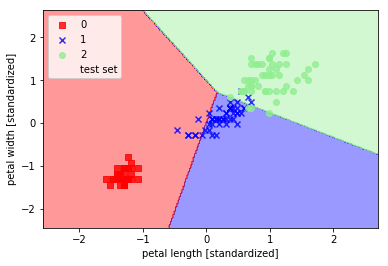

In [33]:
'''
form and siplay thr graph
'''
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Conclusiuon
1. The three flower classes cannot be perfectly separated by a linear decision boundaries
2. The perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.

## Modeling class probabilities via logistic regression
- The biggest disadvantage of perceptron is that it will never converge if the data is not linearly seperable.
- So let us try another another approach: Logistic Regression;

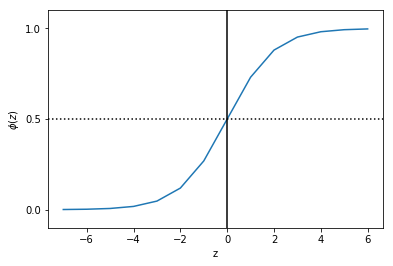

In [34]:
"""
To get an idea of the sigmoid function lets plot it in a range of (-7, 7)
"""
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
z = np.arange(-7, 7)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

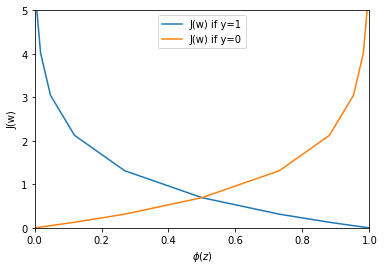

In [35]:
"""
Classification of a single-sample instance for different values of φ(z)
"""
def logistic(y):
    if y==1:
        return -np.log(sigmoid(z))
    elif y==0:
        return -np.log(1 - sigmoid(z))
    
plt.plot(sigmoid(z), logistic(1))
plt.plot(sigmoid(z), logistic(0))
plt.ylim(0.0,5.0)
plt.xlim(0.0, 1.0)
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w)')
plt.legend(["J(w) if y=1", "J(w) if y=0"], loc="upper center")
plt.show()

## Training a logistic regression model with scikit-learn

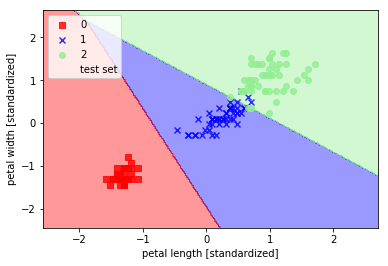

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [37]:
"""
we can predict the class-membership probability of the samples via the predict_proba method
"""
lr.predict_proba(X_test_std[0, :].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

## Tackling overfitting via regularization
Let's visualize the impact of L2 regularization on a LogisticRegression classifier for varying values of the parameter 'c'.

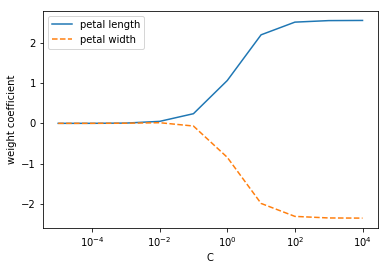

In [38]:
weights, params = [], []
for c in range(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Overview:
**1)** We fitted ten LogisticRegression models with different values for the inverse regularization parameter C.<br>
**2)** For the purposes of illustration, we only collected the weight coefficients of the class 2 vs. all classifier.

## Training a SVM model with scikit-learn

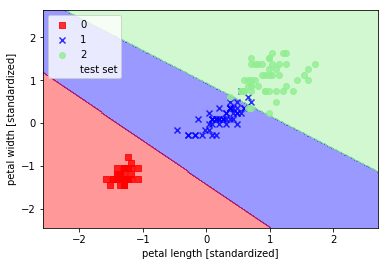

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression VS SVM
1. Logistic regression tries to maximize the conditional likelihoods of the training data, **which makes it more prone to outliers than SVMs.**
2. SVMs mostly care about the points that are _closest to the decision boundary (support vectors)_.
3. Logistic regression has the advantage that it is a simpler model that can be implemented more easily.
4. Logistic regression models can be *easily updated*, which is attractive when working with streaming data.

### Solving nonlinear problems using a kernel SVM

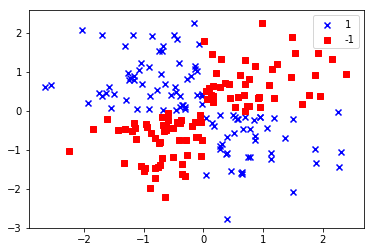

In [40]:
'''
preparing a nonlinear dataset
'''
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

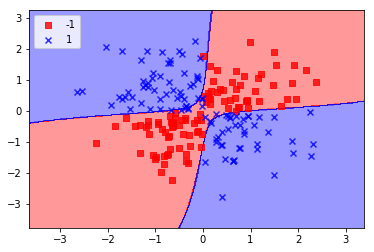

In [41]:
'''
using RBF kernel on the randomly generated non-linear data above.
'''
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

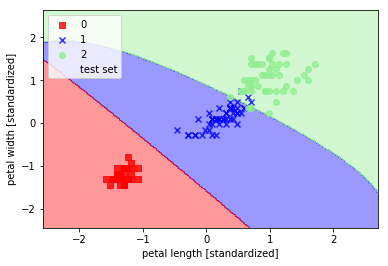

In [42]:
'''
using RBF kernel on the iris dataset
'''
svm = SVC(kernel='rbf', random_state=0, gamma=0.20, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

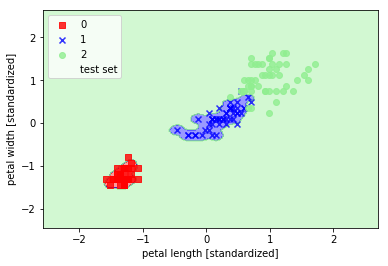

In [43]:
'''
In the above fit, we chose a small gamma resulting in a relatively soft
decision boundary. Let us try a large value.
'''
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()